In [ ]:
# Let's see whether Nilearn is installed
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn

In [176]:
import os
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nibabel as nib
from numpy.linalg import inv



from nilearn import image
from nilearn import plotting
from nilearn.image import mean_img

In [555]:
os.chdir('/Users/admin/Documents/Project')

In [560]:
p_df = pd.read_csv('pheno_clean.csv')

In [561]:
p_df.head()

,Unnamed: 0,SITE_ID,X,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP,FILE_NAME
0,0,PITT,1,50002,no_filename,16.77,1,1,1,Pitt_0050002_func_preproc.nii.gz
1,1,PITT,2,50003,Pitt_0050003,24.45,1,1,1,Pitt_0050003_func_preproc.nii.gz
2,2,PITT,3,50004,Pitt_0050004,19.09,1,1,1,Pitt_0050004_func_preproc.nii.gz
3,3,PITT,4,50005,Pitt_0050005,13.73,2,1,1,Pitt_0050005_func_preproc.nii.gz
4,4,PITT,5,50006,Pitt_0050006,13.37,1,1,1,Pitt_0050006_func_preproc.nii.gz


In [564]:
filenames = p_df.loc[:,'FILE_NAME']

In [88]:
times = []
for i in range(len(filenames)):
    if 'nii.gz' in filenames[i]:
        
        x = os.path.join(repo, filenames[i])
        y = nib.load(x)
        dim = y.shape
        times.append(dim[-1])
    

In [110]:
print(f" min: {min(times)}, max: {max(times)}")
min(times)

 min: 78, max: 316


78

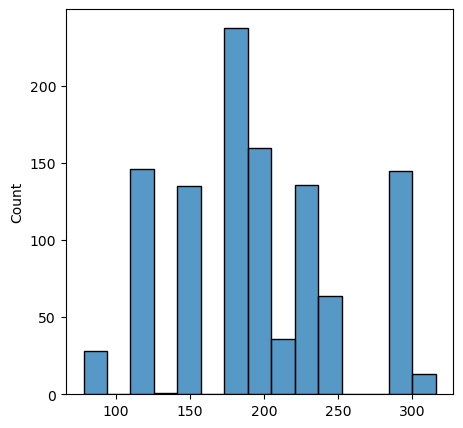

In [96]:
plt.figure(figsize=(5,5))
sns.histplot(times)
plt.show()

In [117]:
below = []
for t in times:
    if t <100:
        below.append(1)
        

In [118]:
sum(below)

28

In [105]:
28/len(filenames)

0.025385312783318223

In [126]:
fmri_file1 = data[1]
f_img = nib.load(fmri_file1)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(61, 73, 61, 206)
(3.0, 3.0, 3.0, 1.5)
('mm', 'unknown')


In [153]:
hdr  = f_img.header

In [127]:
f_img.shape[-1]

206

In [128]:
f_img_data = f_img.get_fdata()
print(f_img_data.shape)

(61, 73, 61, 206)


In [200]:
f_img_1 = all_paths[1]

In [202]:
print(image.load_img(f_img_1).shape)

(61, 73, 61, 176)


In [209]:
first_rsn = image.index_img(f_img_1, 0)
print(first_rsn.shape)

(61, 73, 61)


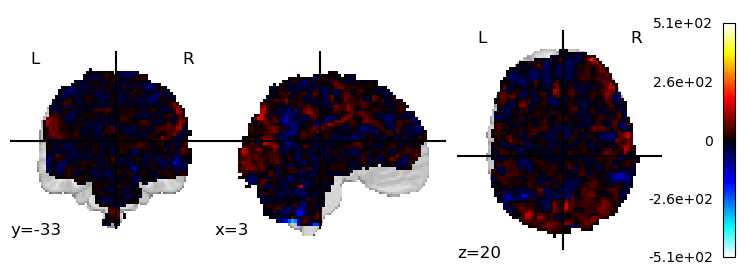

In [210]:
plotting.plot_stat_map(first_rsn)


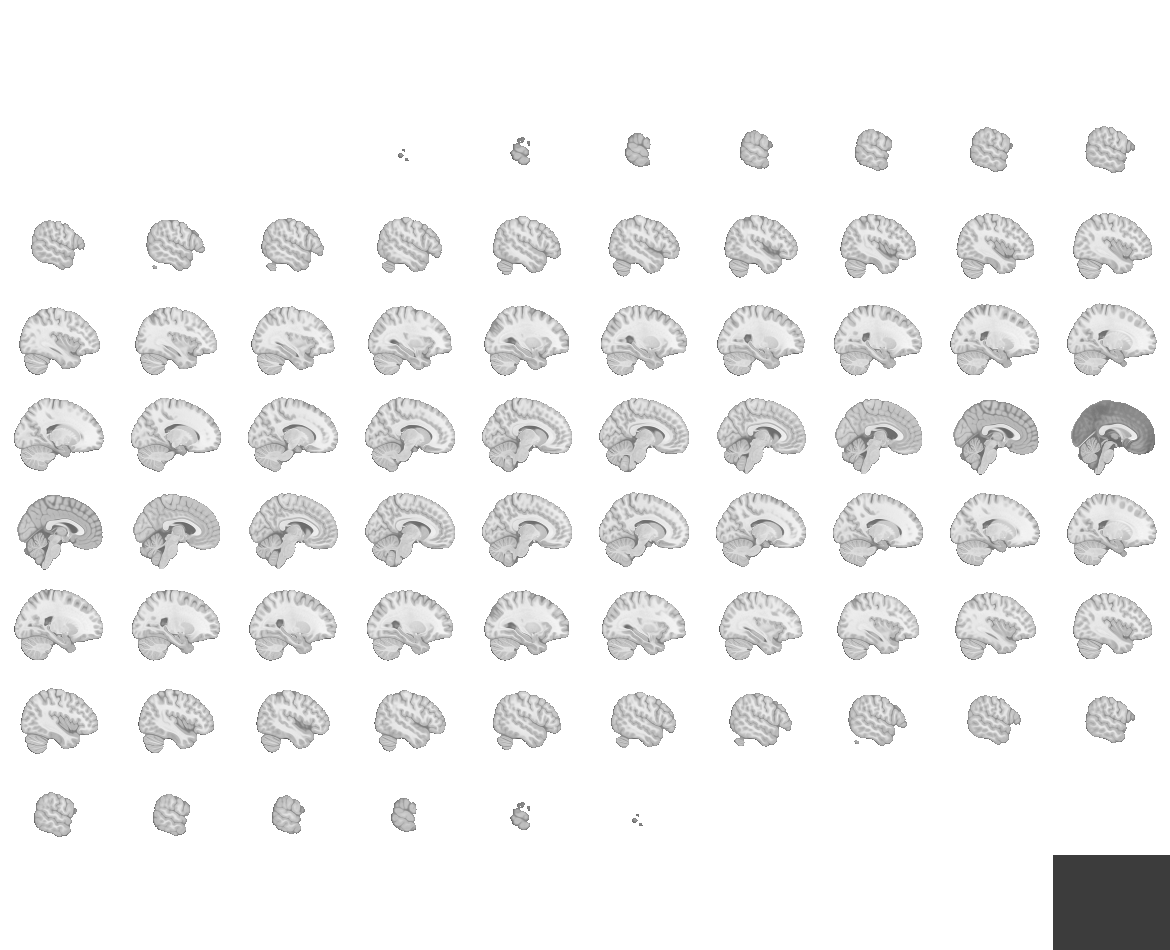
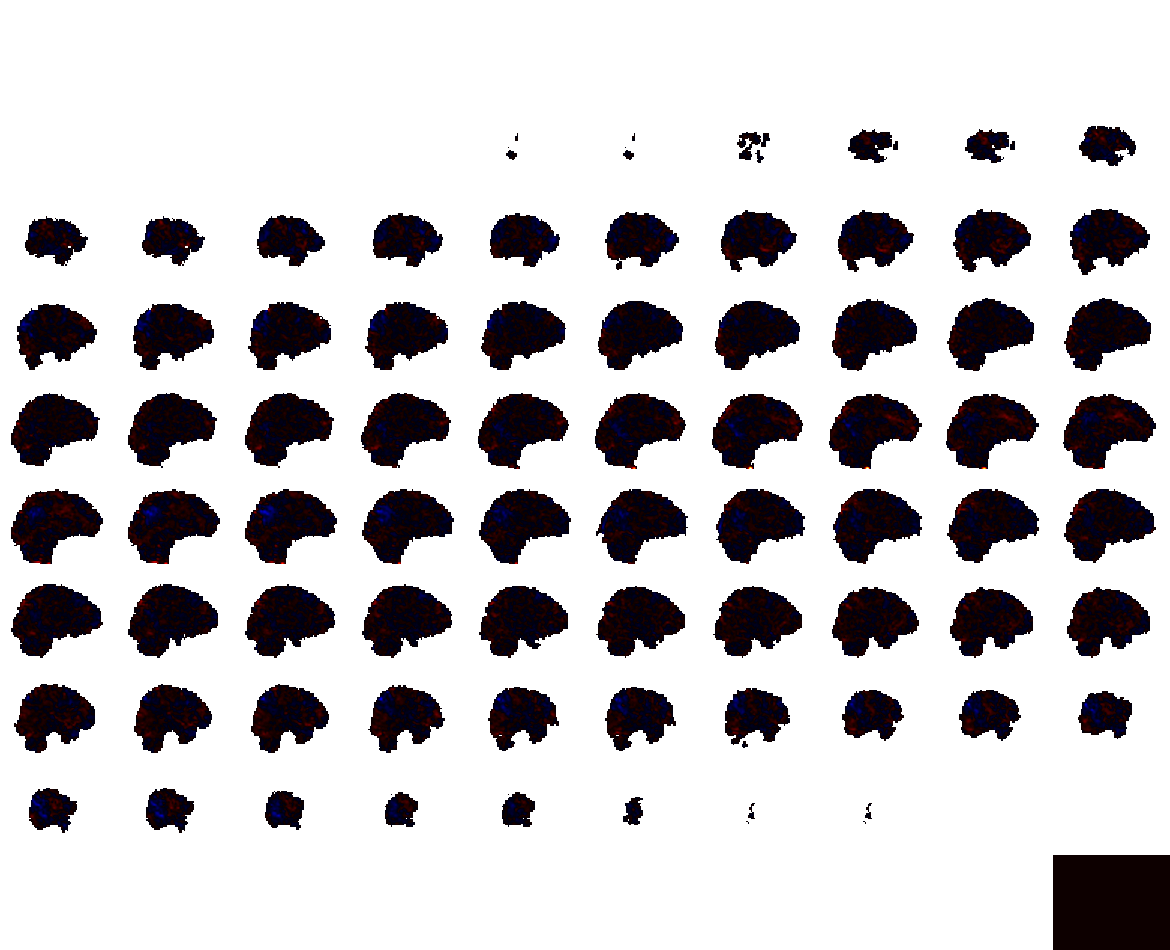

In [265]:

plotting.view_img(mean_img(f_img_1),black_bg = False)


In [219]:
p_df[p_df['FILE_ID']== 'SDSU_0050184']

,SITE_ID,X,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP
123,SDSU,124,50184,SDSU_0050184,17.15,1,2,1


In [243]:
p_df[p_df['DX_GROUP']== 2].index[0]

26

In [246]:
p_df.loc[26,'FILE_ID']

'Pitt_0050030'

In [247]:
f_miri_2 = p_df.loc[26,'FILE_ID'] +'_func_preproc.nii.gz'

In [261]:
first_rsn2 = image.index_img(f_img_2, 0)
print(first_rsn2.shape)

(61, 73, 61)


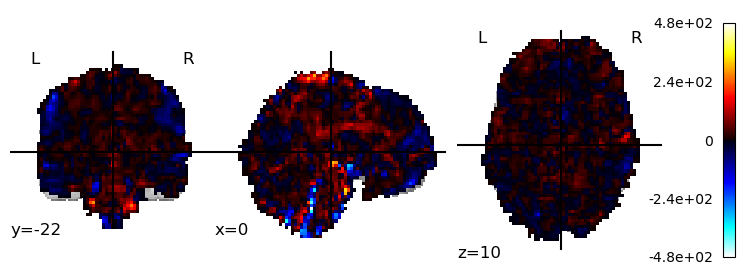

In [262]:
plotting.plot_stat_map(first_rsn2)


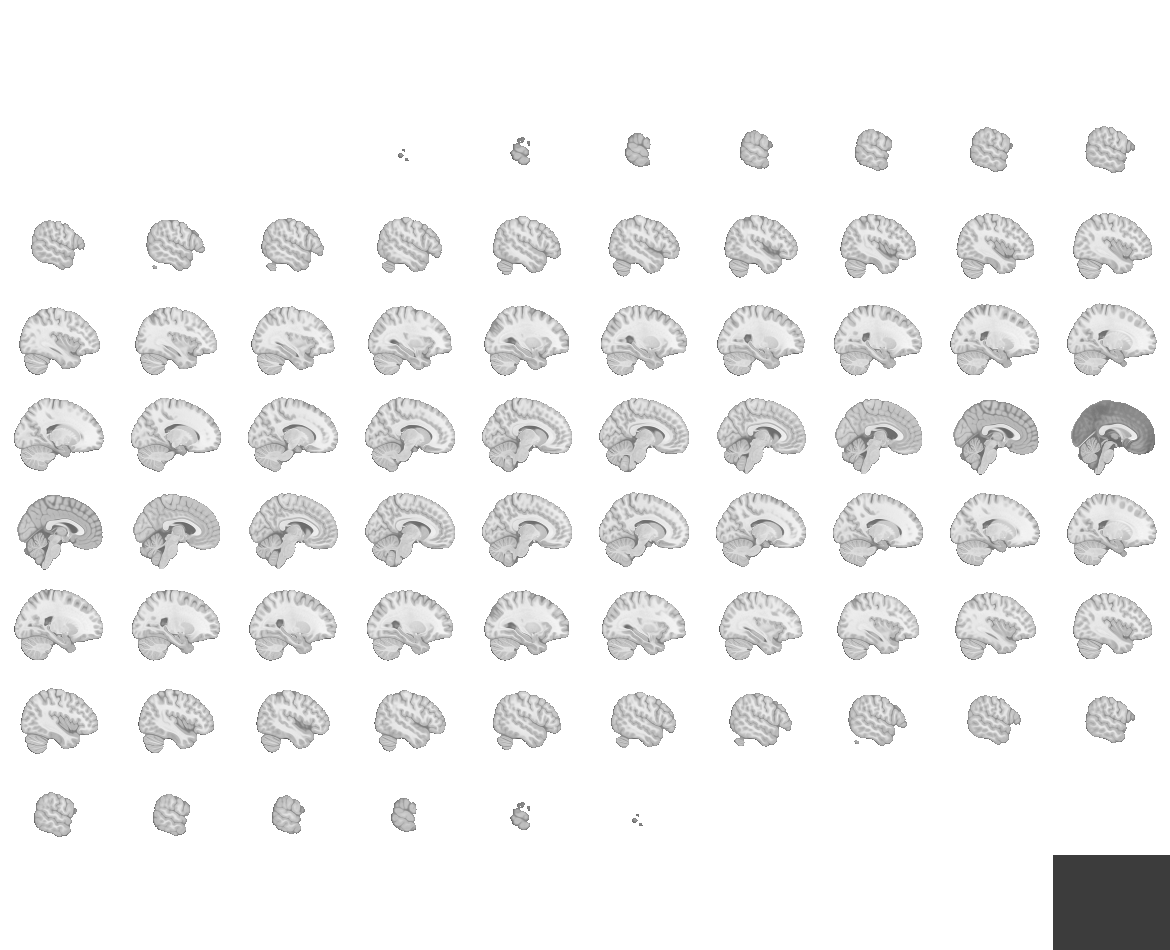
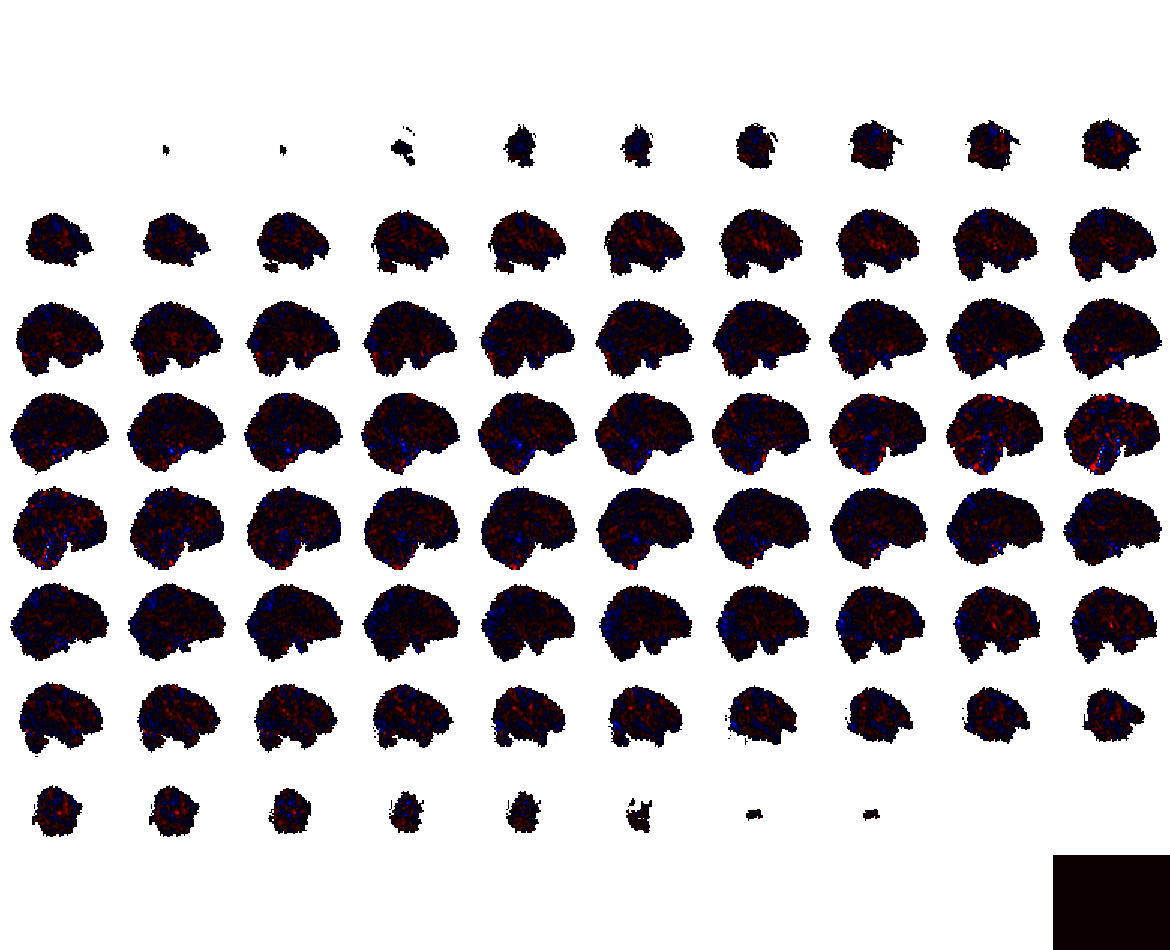

In [264]:
plotting.view_img(mean_img(f_img_2),black_bg = False)